In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dx=pd.read_csv('Linear_X_Train.csv')
dy=pd.read_csv('Linear_Y_Train.csv')

x=dx.values
y=dy.values

x=x.reshape((-1,))
y=y.reshape((-1,))

X = (x-x.mean())/x.std()
Y = y





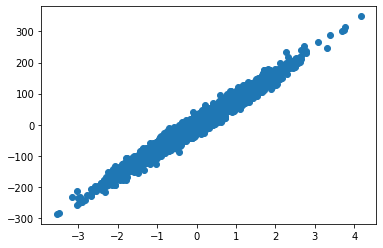

In [4]:
plt.scatter(X,Y)
plt.show()

In [34]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x


def error(X,Y,theta):
    
    m = X.shape[0]
    error = 0
    
    for i in range(m):
        hx = hypothesis(X[i],theta)
        error += (hx-Y[i])**2
        
    return error

def gradient(X,Y,theta):
    
    grad = np.zeros((2,))
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        grad[0] +=  (hx-Y[i])
        grad[1] += (hx-Y[i])*X[i]
        
    return grad
    
#Algorithm
def gradientDescent(X,Y,learning_rate=0.0001):
    
    
    theta = np.array([2,0.0])
    
    itr = 0
    max_itr = 100
    
    error_list = []
    theta_list = []
    
    while(itr<=max_itr):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        
        itr += 1
        
    
    return theta,error_list,theta_list

    

In [35]:


final_theta, error_list,theta_list = gradientDescent(X,Y)

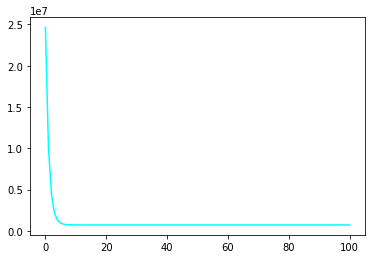

In [36]:
plt.plot(error_list,color='cyan')
plt.show()

In [37]:
print(final_theta)


[ 0.68386897 79.90573694]


In [38]:
xte = pd.read_csv('Linear_X_Test.csv')
xte=xte.values
xtest=xte.reshape((-1,))
print(xtest.shape)

(1250,)


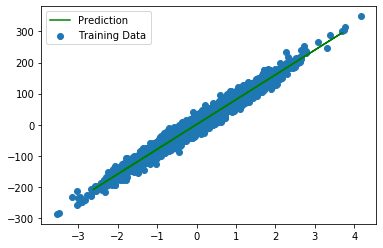

In [39]:
plt.scatter(X,Y,label='Training Data')
plt.plot(xtest,hypothesis(xtest,final_theta),color='green',label="Prediction")
plt.legend()
plt.show()